In [188]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [189]:
# Fungsi untuk memuat data
def load_data(filename):
    data = pd.read_csv(filename, delimiter=';')
    features = data.iloc[:, :-1].values
    labels = data.iloc[:, -1].values
    return features, labels

In [190]:
def split_data(features, labels, test_size=0.2):
    # Menggabungkan features dan labels untuk pengacakan bersama
    data = np.column_stack((features, labels))  # Pastikan semua elemen konsisten
    np.random.seed(30)  # Set seed untuk konsistensi
    np.random.shuffle(data)  # Mengacak data
    
    # Pisahkan kembali features dan labels
    features, labels = data[:, :-1], data[:, -1]
    
    # Tentukan indeks pembagian
    split_index = int(len(features) * (1 - test_size))
    train_features = features[:split_index]
    train_labels = labels[:split_index]
    test_features = features[split_index:]
    test_labels = labels[split_index:]
    
    return train_features, train_labels, test_features, test_labels


In [191]:
# Fungsi untuk menghitung jarak Euclidean antara dua titik
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Fungsi KNN
def knn_classify(features, labels, test_point, k=3):
    distances = np.array([euclidean_distance(feature, test_point) for feature in features])
    nearest_indices = distances.argsort()[:k]
    nearest_labels = labels[nearest_indices]
    unique_labels, counts = np.unique(nearest_labels, return_counts=True)
    return unique_labels[np.argmax(counts)]

In [192]:
# Fungsi untuk menghitung akurasi
def calculate_accuracy(test_features, test_labels, train_features, train_labels, k):
    correct_predictions = 0
    for test_point, true_label in zip(test_features, test_labels):
        predicted_label = knn_classify(train_features, train_labels, test_point, k)
        if predicted_label == true_label:
            correct_predictions += 1
    return (correct_predictions / len(test_labels)) * 100

In [193]:
# Load data
filename = 'data iris.csv'
features, labels = load_data(filename)

# Split data
train_features, train_labels, test_features, test_labels = split_data(features, labels)

In [ ]:
# # Mengonversi data latih dan data uji menjadi DataFrame
# train_df = pd.DataFrame(train_features, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
# train_df['Label'] = train_labels

# test_df = pd.DataFrame(test_features, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
# test_df['Label'] = test_labels

# # Menampilkan seluruh data latih dan data uji
# print("Data Latih (Train):")
# print(train_df)

# print("\nData Uji (Test):")
# print(test_df)


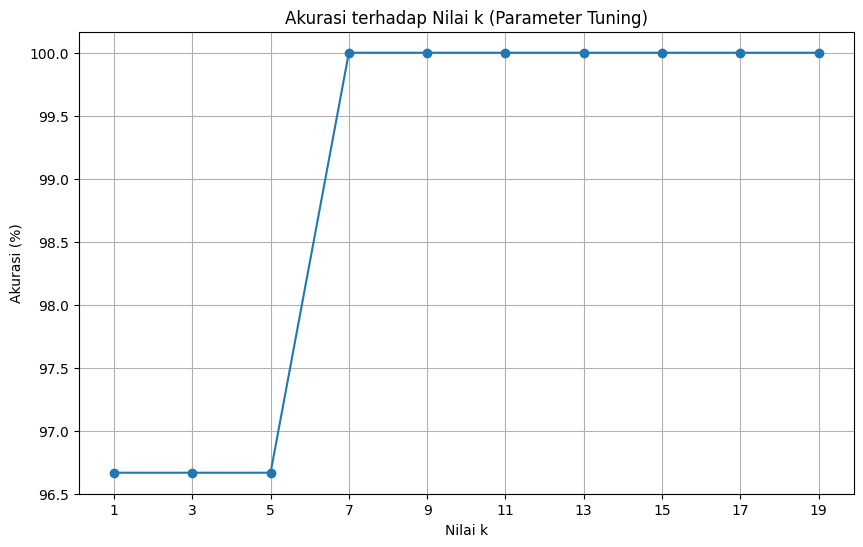

In [194]:
# Mencoba beberapa nilai k untuk tuning parameter
k_values = range(1, 21,2)
accuracies = [calculate_accuracy(test_features, test_labels, train_features, train_labels, k) for k in k_values]

# Visualisasi tuning k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Akurasi terhadap Nilai k (Parameter Tuning)')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi (%)')
plt.xticks(k_values)
plt.grid()
plt.show()

In [195]:
# Visualisasi dataset
df = pd.DataFrame(features, columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
df['Label'] = labels

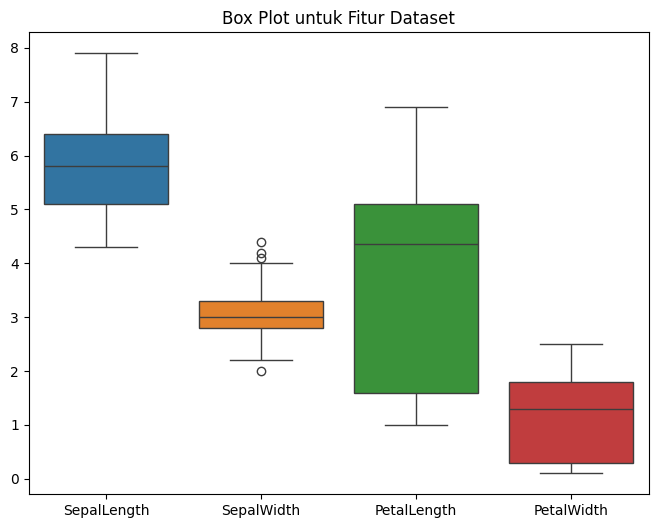

In [196]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title('Box Plot untuk Fitur Dataset')
plt.show()

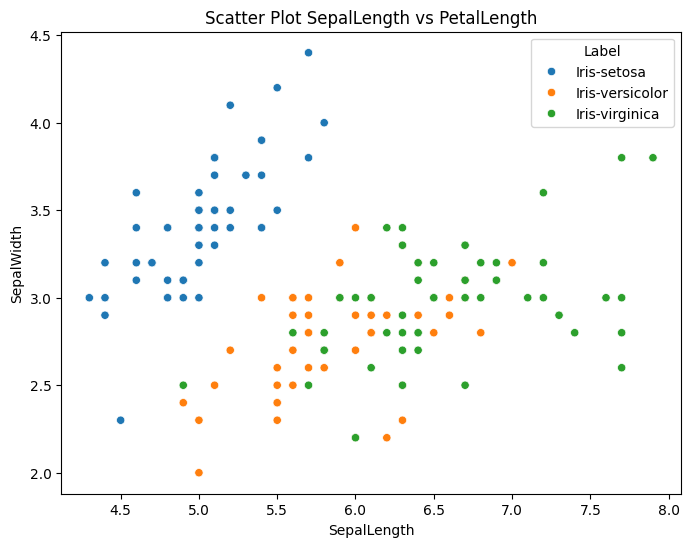

In [197]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLength', y='SepalWidth', hue='Label', data=df)
plt.title('Scatter Plot SepalLength vs PetalLength')
plt.show()

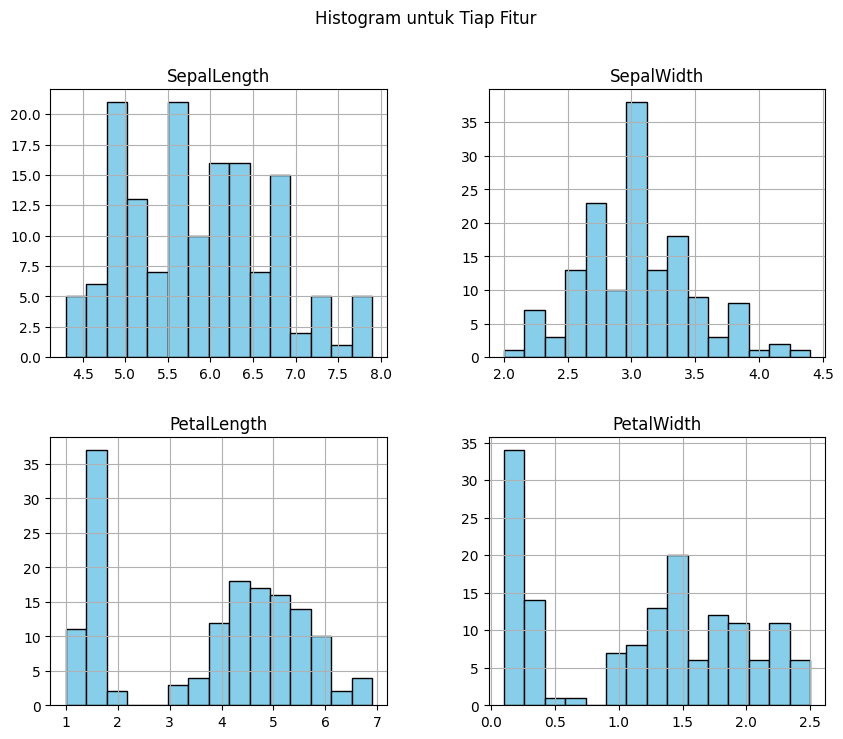

In [198]:
# Histogram
df.iloc[:, :-1].hist(bins=15, figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histogram untuk Tiap Fitur')
plt.show()

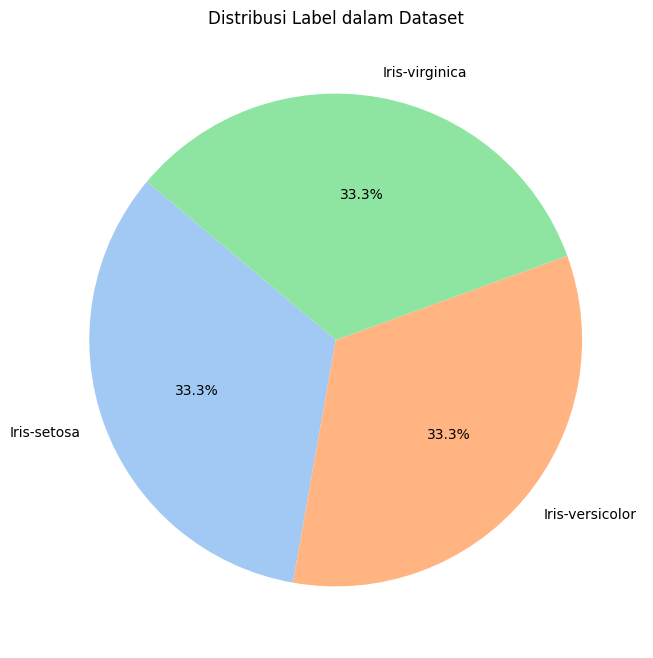

In [199]:
# Pie Chart
label_counts = df['Label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribusi Label dalam Dataset')
plt.show()